# MACHINE LEARNING LAB

## EXERCISE 2

### Aim : 
Use the house_pred.csv file to build a multiple linear regression model. sklearn shall be used to fit the model. 

Perform necessary preprocessing and check for outliers and multi-collinearity. Apply the same set of preprocessing to the test.csv and use the data to predict the house price. The evaluation criteria will be Root Mean Squared Error

### Algorithm : 

1. **Data Preprocessing and Exploration**:
   - Load and preprocess `house_pred.csv`, handling missing values and outliers.
   - Explore data with EDA to understand features and relationships.

2. **Model Building and Evaluation**:
   - Split data into train and validation sets.
   - Use sklearn to build a multiple linear regression model.
   - Train the model and evaluate with RMSE.

3. **Prediction on Test Data**:
   - Apply preprocessing steps to `test.csv`.
   - Use trained model to predict house prices.
   - Evaluate predictions with RMSE.

### Code and Output : 

In [1]:
pip install Numpy==1.23.5

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

C:\Users\TEJU\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv(r"C:\Users\TEJU\Downloads\house_pred (1).csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def ThresholdandND_columnRemoval(df):
    N = len(df)
    columns = df.columns
    for col in columns:
        if (len(df[col].unique()) == 1):
            df = df.drop([col],axis=1)
            continue
        notnull = df[col].isnull().sum()
        ratio = notnull / N
        if(ratio >= 0.30):
            df = df.drop([col],axis=1)
    return df

def Handling_NullValues(df):
    columns = df.columns
    for col in columns:
        typeCol = str(df[col].dtype)
        if typeCol == 'object':
            df = df[df[col].notna()]
        else:
            mean = df[col].mean()
            median = df[col].median()
            standard_deviation = df[col].std()
            pmc = (3 * (mean - median)) / standard_deviation
            if pmc >= 0.4 or pmc <= -0.4:
                df[col] = df[col].fillna(median)
            else:
                df[col] = df[col].fillna(mean)
    return df

def OneHotEncoding_objects(df):
    columns = df.columns
    for col in columns:
        typeCol = str(df[col].dtype)
        if typeCol == 'object':
            enc = pd.get_dummies(df[col])
            encCol = enc.columns
            newColumns = {}
            for i in range(0,len(encCol)):
                newColumns[encCol[i]] = col + encCol[i]
            enc.rename(columns = newColumns, inplace = True)
            df = df.join(enc)
            df = df.drop([col],axis=1)
    return df

def IQR_Removal(df):
    columns = df.columns
    for col in columns:
        if col == 'SalePrice':
            continue
        typeCol = str(df[col].dtype)
        if typeCol != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            iqr = Q3 - Q1
            df = df[(df[col] >= Q1 - 1.5*iqr) & (df[col] <= Q3 + 1.5*iqr)]
    return df

In [6]:
df = OneHotEncoding_objects(IQR_Removal(Handling_NullValues(ThresholdandND_columnRemoval(data))))
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAbnorml,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,80.0,10000,8,5,1995,1996,438.0,1079,...,0,0,0,1,0,0,0,0,1,0
1448,1449,50,70.0,11767,4,7,1910,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0,...,0,1,0,0,0,0,0,0,0,1
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410,...,0,0,0,1,0,0,0,0,1,0


In [7]:
def VIF_Filter(df,dfTest):
    xCol = list(set(list(df.columns)) & set(list(dfTest.columns)))
    xCol.remove('Id')
    while(1):
      finished = True
      xVal = df[xCol]
      xVal['intercept'] = 1
      vif = pd.DataFrame()
      vif['variable'] = xVal.columns
      vif['vif'] = [VIF(xVal.values,i) for i in range(xVal.shape[1])]
      for i in range(0,len(vif)):
          var = str(vif.iloc[i,0])
          val = str(vif.iloc[i,1])
          if(var == 'intercept'):
              continue
          elif(val == 'inf'):
              xCol.remove(var)
              finished = False
              break
          else:
              val = float(val)
              if val > 3:
                  xCol.remove(var)
                  finished = False
                  break
      if finished == True:
          return xCol, vif

In [10]:
testdata = pd.read_csv(r"C:\Users\TEJU\Downloads\test (1).csv")
testdf = OneHotEncoding_objects(IQR_Removal(Handling_NullValues(ThresholdandND_columnRemoval(testdata))))
columns, vif = VIF_Filter(df,testdf)

C:\Users\TEJU\AppData\Local\Temp/ipykernel_16600/2458712660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xVal['intercept'] = 1
C:\Users\TEJU\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\TEJU\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\TEJU\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<AxesSubplot:>

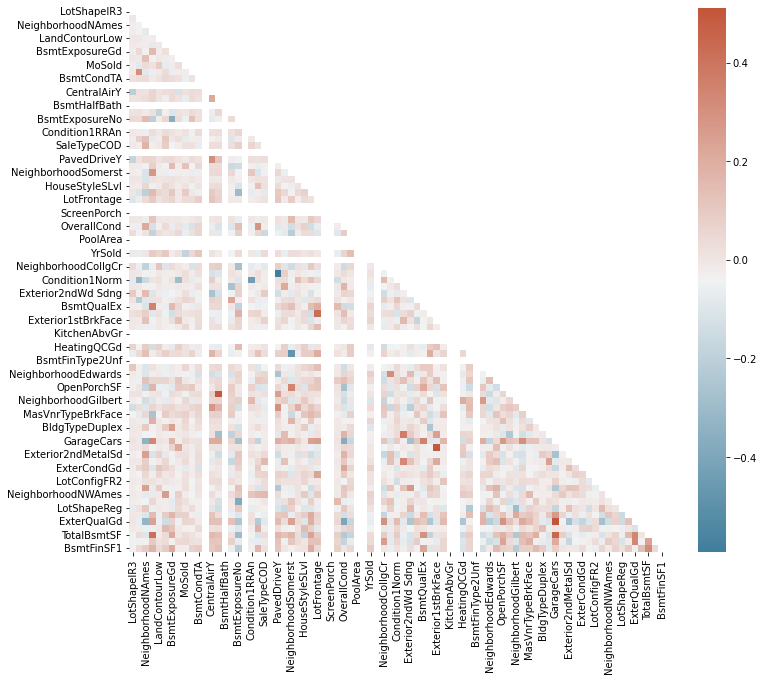

In [12]:
corr = df[columns].corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap=cmap)

In [14]:
y = df['SalePrice']
x = df[columns]
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [15]:
reg.intercept_, reg.coef_

(-1594359.180326281,
 array([ 1.48196131e+04,  1.79923581e+03, -2.01900480e+04,  8.29220098e+03,
        -3.11602711e+04, -2.13025379e+04,  9.85542569e+03,  1.01402363e+04,
        -4.80839507e+01, -6.51601042e+03,  4.32819720e+03, -1.10285328e-08,
         1.54644927e+03,  1.10831132e+04,  6.89396984e-10, -1.80896810e+03,
         2.60902265e+03,  1.70985004e-10,  9.34399022e+03, -1.51054025e+04,
        -6.89746609e+03, -3.63797881e-12, -1.49015826e+03,  1.58803862e+04,
         2.64284679e+04, -3.24440391e+04, -6.77657514e+03,  2.90603693e+01,
         3.06347254e+02,  6.18456397e-11, -3.81987775e-11, -3.23539744e+04,
         2.95778294e+03,  6.48982182e+02,  1.86446414e-11, -5.02389241e-11,
         7.86574452e+02, -5.45696821e-12, -1.59962832e+02,  6.81430689e+03,
         1.49720747e+04, -3.79134049e+04, -4.44976327e+02,  9.50544655e+03,
         4.79540257e+04,  8.62056422e+03,  2.85956868e+04,  3.30992550e+04,
        -1.31876732e-11,  0.00000000e+00, -6.49579038e+03,  2.00776

In [17]:
x_test = testdf[columns]
y_forTest = reg.predict(x_test)
y_forTest

array([176378.22648779, 208983.52778748, 290000.        , 259602.35385925,
       196874.42652567, 110157.92856467, 142053.28850765, 147620.23703439,
       190748.79104513, 225113.75690499, 174088.87649298, 206004.63007601,
       203899.99223414, 221843.22098781, 178814.32583258, 151970.68978991,
       191895.4718545 , 249476.85597501, 158440.66623878, 131101.521714  ,
       238783.07427756, 165335.360849  , 211234.4214451 , 170922.61185717,
       230529.38276664, 164397.9115744 , 188796.53885744, 196219.72656122,
       228279.65302757, 231189.58306462, 192178.72629544, 196539.36220642,
       174165.52529681, 173215.57956365, 206689.93686828, 115634.04844513,
       174531.9662555 ])

In [18]:
y_pred = reg.predict(x)
math.sqrt(mean_squared_error(y,y_pred))

23373.573363257263

In [19]:
reg.score(x,y)

0.8460571194156481

### Results : 
Therefore, we were successfully able to build the multiple linear regression model and use the train data to predict the house prices in the test data. 